In [ ]:
##########

## Project: MNIST Classification Project with a CNN model

##########

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load the data

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data('mnist')

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Explore the Data

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

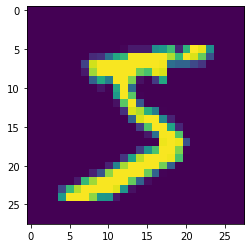

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# so we want to Hot Encode y_train

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape               # just gives 60,000 labelled numbers. we want one hot encoding for each of these numbers to represent a category

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [ ]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# now that we experimented with above, let's apply the same for the actual train and test sets

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [ ]:
# Now let's scale our x_train and x_test

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
scaled_image = x_train[0]

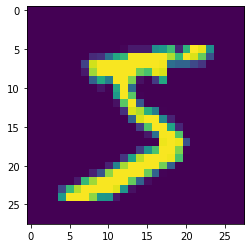

In [21]:
plt.imshow(scaled_image)

In [22]:
x_train.shape

(60000, 28, 28)

In [ ]:
##############################################################

# Moving on to Building our Artificial Neural Network

In [23]:
# batch size, width, height,channels
x_train = x_train.reshape(60000,28,28,1)

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [26]:
model = Sequential()

# we didnt specify padding since 28/4= Full num
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [29]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1406 - accuracy: 0.9574 - val_loss: 0.0597 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0424 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0436 - val_accuracy: 0.9855


In [ ]:
# That took a while!

In [ ]:
##############################################################

# Evaluating the model against our TEST set

In [30]:
metrics = pd.DataFrame(model.history.history)

In [31]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140644,0.957350,0.059719,0.9815
1,0.049895,0.984583,0.042367,0.9852
2,0.031157,0.990233,0.043578,0.9855


<AxesSubplot:>

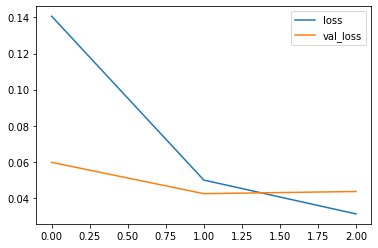

In [33]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

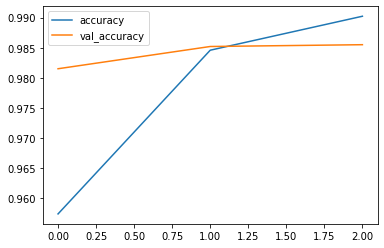

In [34]:
metrics[['accuracy','val_accuracy']].plot()

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test,y_cat_test,verbose=0,)

[0.043578192591667175, 0.9854999780654907]

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
preds_prob = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [44]:
predictions = np.argmax(preds_prob, axis=1)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# The model performs well on the validation set!